Linking to GEOS 3.7.2dev, GDAL 2.4.2, PROJ 6.1.0


In [1]:
library(tidyr)
library(readr)
library(plyr)
library(dplyr)
#library(stringr)
library(rgdal)
library(ggplot2)
library(sf)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: sp
rgdal: version: 1.4-4, (SVN revision 833)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.2, released 2019/06/28
 Path to GDAL shared files: /Users/enost/anaconda3/envs/r/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.1.0, May 15th, 2019, [PJ_VERSION: 610]
 Path to PROJ.4 shared files: /Users/enost/anaconda3/envs/r/share/proj
 Linking to sp version: 1.3-1 
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Linking to GEOS 3.7.2dev, GDAL 2.4.2, PROJ 6.1.0


In [2]:
daily<-read_csv("https://raw.githubusercontent.com/ericnost/gfw/setup/data/2016-12-22.csv")

Parsed with column specification:
cols(
  date = col_date(format = ""),
  lat_bin = col_double(),
  lon_bin = col_double(),
  mmsi = col_double(),
  fishing_hours = col_double(),
  lat = col_double(),
  long = col_double(),
  latlong = col_character()
)


In [14]:
countries <- read_sf("https://raw.githubusercontent.com/ericnost/gfw/setup/data/countries.geojson")
wcpfc_map <- read_sf("https://raw.githubusercontent.com/ericnost/gfw/setup/data/wcpfc.geojson") 
spc <- read_sf("https://raw.githubusercontent.com/ericnost/gfw/setup/data/spc.geojson")

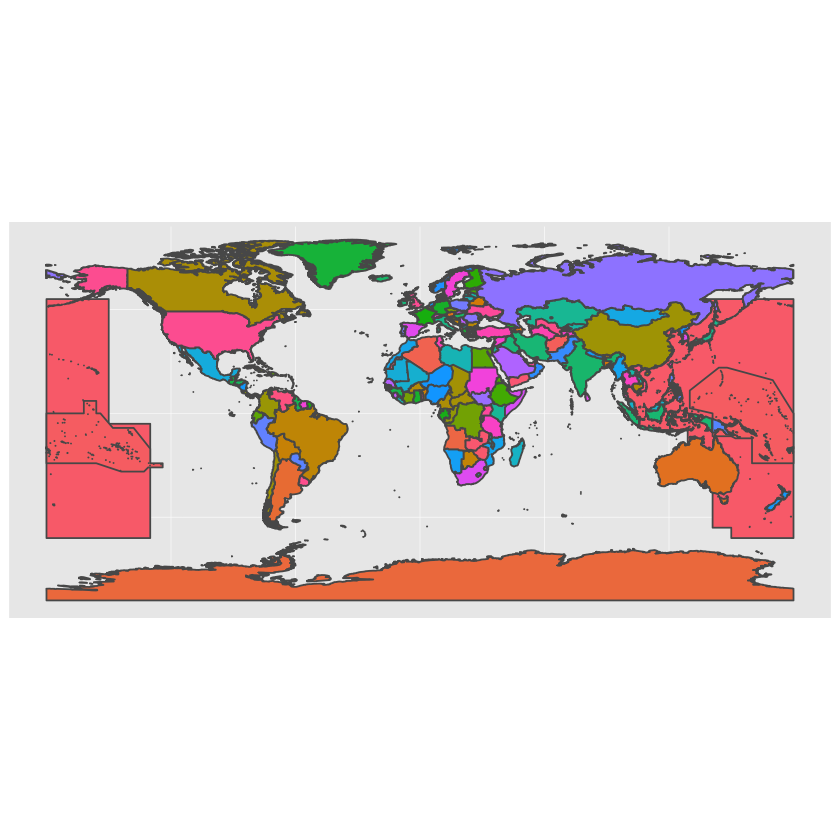

In [15]:
map = ggplot() + 
geom_sf(data = wcpfc_map, aes(fill = blue)) +
geom_sf(data = spc, aes(fill = green)) +
geom_sf(data = countries, aes(fill = NAME)) +
theme(legend.position = "none") 
map

OGR data source with driver: GeoJSON 
Source: "https://raw.githubusercontent.com/ericnost/gfw/setup/data/countries.geojson", layer: "countries"
with 255 features
It has 94 fields
OGR data source with driver: GeoJSON 
Source: "https://raw.githubusercontent.com/ericnost/gfw/setup/data/wcpfc.geojson", layer: "wcpfc"
with 2 features
It has 1 fields
OGR data source with driver: GeoJSON 
Source: "https://raw.githubusercontent.com/ericnost/gfw/setup/data/spc.geojson", layer: "spc"
with 2 features
It has 1 fields


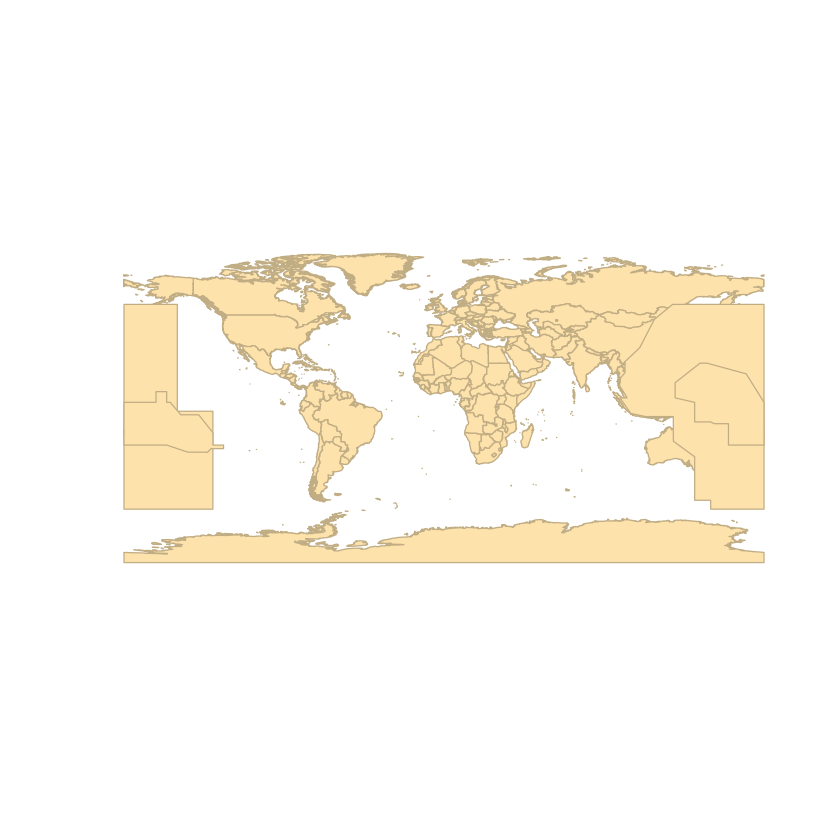

In [57]:
#load geographies
countries <- read_sf("https://raw.githubusercontent.com/ericnost/gfw/setup/data/countries.geojson")#readOGR(dsn="https://raw.githubusercontent.com/ericnost/gfw/setup/data/countries.geojson")
plot(countries, border="wheat3", col="wheat1")

wcpfc_map <- readOGR(dsn="https://raw.githubusercontent.com/ericnost/gfw/setup/data/wcpfc.geojson") #<- readOGR(dsn = "https://github.com/ericnost/gfw/tree/setup/shapefiles/Pacific", layer = "WCPFC") 
plot(wcpfc_map, border="wheat3", col="wheat2", add=T)

spc <- readOGR(dsn="https://raw.githubusercontent.com/ericnost/gfw/setup/data/spc.geojson")
plot(spc, border="wheat3", col="wheat3", add=T)

In [8]:
#load main vessel DB
vessels_full <- read_csv("https://raw.githubusercontent.com/ericnost/gfw/setup/data/vessels.csv")

#load WCPFC DB
wcpfc <- read_csv("https://raw.githubusercontent.com/ericnost/gfw/setup/data/RFV_database_export.csv")

Parsed with column specification:
cols(
  mmsi = col_double(),
  shipname = col_character(),
  callsign = col_character(),
  flag = col_character(),
  imo = col_logical(),
  registry_geartype = col_character(),
  inferred_geartype = col_character(),
  inferred_geartype_score = col_double(),
  inferred_subgeartype = col_character(),
  inferred_subgeartype_score = col_double(),
  registry_length = col_double(),
  inferred_length = col_double(),
  registry_tonnage = col_double(),
  inferred_tonnage = col_double(),
  registry_engine_power = col_double(),
  inferred_engine_power = col_double(),
  source = col_character()
)
Warning message:
“12059 parsing failures.
  row col           expected  actual                                                                    file
99627 imo 1/0/T/F/TRUE/FALSE 9829978 'https://raw.githubusercontent.com/ericnost/gfw/setup/data/vessels.csv'
99628 imo 1/0/T/F/TRUE/FALSE 9731107 'https://raw.githubusercontent.com/ericnost/gfw/setup/data/vessels.csv'
99629

In [9]:
head(wcpfc)

Submitted by CCM,VID,Vessel Name,Flag,Registration Number,WIN,Previous Names,Reg Port,Owner Name,Owner Address,...,Auth Period To,Purse seine vessel authorised to tranship at sea,IMO-LR,Authorisation to tranship on the high seas,Under Charter,Charterer Name,Chartering CCM,Address of Charter,Charter Start Date,Charter End Date
China,2,LONG XING 607,China,(LIAO)CHUANDENG(JI)(2018)FT-200065,BZSQ8,NONE,Dalian,"DALIAN OCEAN FISHING CO.,LTD.","No.38 Changjiang Road, Zhongshan District, Dalian，China",...,31-Mar-20,Not specified,8682517,YES,NO,NA,NA,NA,NA,NA
China,3,LONG XING 608,China,(LIAO)CHUANDENG(JI)(2018)FT-200066,BZSQ9,NONE,Dalian,"DALIAN OCEAN FISHING CO.,LTD.","No.38 Changjiang Road, Zhongshan District, Dalian，China",...,31-Mar-20,Not specified,8682529,YES,NO,NA,NA,NA,NA,NA
China,4,QING YUAN YU 001,China,(LU)CHUANDENG(JI)(2019)FT-200023,BZZP,FULL MESNS NO.1,Qingdao,"Qingdao Furui Fisheries Co.,LTD.","1502，NO.2 Building,19 Fuzhou Nan Road Qingdao,China",...,31-Mar-20,Not specified,8662622,YES,NO,NA,NA,NA,NA,NA
China,7,QING YUAN YU 004,China,(LU)CHUANDENG(JI)(2019)FT-200030,BZZP4,FULL MESNS NO.2,Qingdao,Qingdao Furui Fisheries Co.Ltd,"1502，NO.2 Building,19 Fuzhou Nan Road Qingdao,China",...,31-Mar-20,Not specified,8662634,YES,NO,NA,NA,NA,NA,NA
China,11,QING YUAN YU 008,China,(LU)CHUANDENG(JI)(2019)FT-200031,BZZP8,FULL HOPE NO.1,Qingdao,Qingdao Furui Fisheries Co.Ltd,"1502，NO.2 Building,19 Fuzhou Nan Road Qingdao,China",...,31-Mar-20,Not specified,8662646,YES,NO,NA,NA,NA,NA,NA
China,12,QING YUAN YU 009,China,(LU)CHUANDENG(JI)(2019)FT-200032,BZZP9,FULL HOPE NO.2,Qingdao,Qingdao Furui Fisheries Co.Ltd,"1502，NO.2 Building,19 Fuzhou Nan Road Qingdao,China",...,31-Mar-20,Not specified,8662658,YES,NO,NA,NA,NA,NA,NA


In [52]:
#Zoom in to Dongwon
#ky<-wcpfc[grep("KYOKUYO", wcpfc$`Owner Name`),] #5 vessels
dongwon<-wcpfc[grep("DONGW", wcpfc$`Owner Name`),] #44 vessels
dongwon
#merge dongwon and ky
#dongwon<-rbind(dongwon,ky)

Submitted by CCM,VID,Vessel Name,Flag,Registration Number,WIN,Previous Names,Reg Port,Owner Name,Owner Address,...,Auth Period To,Purse seine vessel authorised to tranship at sea,IMO-LR,Authorisation to tranship on the high seas,Under Charter,Charterer Name,Chartering CCM,Address of Charter,Charter Start Date,Charter End Date
Korea (Republic of),434,NO.639 DONGWON,Korea (Republic of),1203001-6261109,6KCA,CHOKYU MARU NO.1,Busan,"DONGWON FISHERIES CO.,LTD","8, TEHERAN-RO 8GIL, Gangnam-Gu, Seoul, Korea",...,28-Mar-22,Not specified,9011167,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),901,NO.617 DONG WON,Korea (Republic of),9512348-6260001,HLJF,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,17-Mar-23,Not applicable,8714023,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),902,NO.618 DONG WON,Korea (Republic of),9512379-6260004,6KWS,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,2-Jul-24,Not applicable,8815669,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),903,NO.619 DONG WON,Korea (Republic of),9512380-6260001,6KWT,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,29-Jun-24,Not applicable,8815671,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),904,NO.620 DONG WON,Korea (Republic of),9512388-6260003,6LCI,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,16-Aug-19,Not applicable,8821498,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),905,NO.621 DONG WON,Korea (Republic of),9503037-6210006,6NLA,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,15-Sep-22,Not applicable,8905567,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),906,NO.622 DONG WON,Korea (Republic of),9509033-6260008,DTAA5,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,15-Mar-23,Not applicable,8905579,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),907,NO.623 DONG WON,Korea (Republic of),9412015-6210005,DSDR7,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,28-Mar-23,Not applicable,8905581,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),909,NO.637 DONG WON,Korea (Republic of),0910001-6261101,DTBW8,KENKYU MARU NO.18,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,9-Nov-19,Not applicable,9032991,YES,NO,NA,NA,NA,NA,NA
Korea (Republic of),912,NO.631 DONG WON,Korea (Republic of),9701004-6260005,DTAM4,NONE,Busan,"DONGWON FISHERIES Co., Ltd","8, TEHERAN-RO 8GIL, GANGNAM-GU, SEOUL, KOREA",...,28-Jan-22,Not applicable,8911310,YES,NO,NA,NA,NA,NA,NA


In [53]:
#Get the identifying info for Dongwon vessels, as described in the WCPFC RFV.
dongwon_imos<-dongwon$`IMO-LR`
dongwon_ircs<-dongwon$IRCS

filtered<-vessels_full[which(vessels_full$imo %in% dongwon_imos | vessels_full$callsign %in% dongwon_ircs ),]

dailies_filtered<-daily[which(daily$mmsi %in% filtered$mmsi),] #filtered to dongwon
dailies_extracted<-daily[-which(daily$mmsi %in% filtered$mmsi),] #all other vessels

In [54]:
#join vessels and effort
dongwon_fishing<-merge(dailies_filtered, filtered, by = "mmsi")
allother_fishing<-merge(dailies_extracted, vessels_full, by ="mmsi")
dongwon_fishing

mmsi,date,lat_bin,lon_bin,fishing_hours,lat,long,latlong,shipname,callsign,...,inferred_geartype_score,inferred_subgeartype,inferred_subgeartype_score,registry_length,inferred_length,registry_tonnage,inferred_tonnage,registry_engine_power,inferred_engine_power,source
440195000,2016-12-22,-20,1741,0.4751389,-1.95,174.15,"-1.95, 174.15",SEGYERO,6KCD2,...,0.8005054,purse_seines,0.8005054,79.6000,76.38455,NA,1571.5611,3667.991,4028.1910,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440233000,2016-12-22,-68,-1755,0.6090278,-6.75,-175.45,"-6.75, -175.45",CARIBE,DTBQ7,...,0.9984821,purse_seines,0.9984821,74.6630,67.21381,NA,1273.2418,2672.400,3079.8755,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440233000,2016-12-22,-68,-1756,2.5755556,-6.75,-175.55,"-6.75, -175.55",CARIBE,DTBQ7,...,0.9984821,purse_seines,0.9984821,74.6630,67.21381,NA,1273.2418,2672.400,3079.8755,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440233000,2016-12-22,-67,-1756,0.3052778,-6.65,-175.55,"-6.65, -175.55",CARIBE,DTBQ7,...,0.9984821,purse_seines,0.9984821,74.6630,67.21381,NA,1273.2418,2672.400,3079.8755,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440233000,2016-12-22,-64,-1759,0.3650000,-6.35,-175.85,"-6.35, -175.85",CARIBE,DTBQ7,...,0.9984821,purse_seines,0.9984821,74.6630,67.21381,NA,1273.2418,2672.400,3079.8755,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440236000,2016-12-22,81,-183,6.8979167,8.15,-18.25,"8.15, -18.25",DONGWON216,6NMK,...,0.9999995,drifting_longlines,0.9999995,52.6204,47.79229,408.2,449.4847,890.800,873.2205,"AIS,CLAV,FFA,IATTC,ITU,KOR,WCPFC"
440479000,2016-12-22,-20,1740,0.8443056,-1.95,174.05,"-1.95, 174.05",ELSPETH,6NHK,...,0.9989618,purse_seines,0.9989618,73.0490,70.49200,NA,1192.8457,2672.733,2947.6311,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440479000,2016-12-22,-20,1741,0.3725000,-1.95,174.15,"-1.95, 174.15",ELSPETH,6NHK,...,0.9989618,purse_seines,0.9989618,73.0490,70.49200,NA,1192.8457,2672.733,2947.6311,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440479000,2016-12-22,-19,1741,0.7208333,-1.85,174.15,"-1.85, 174.15",ELSPETH,6NHK,...,0.9989618,purse_seines,0.9989618,73.0490,70.49200,NA,1192.8457,2672.733,2947.6311,"AIS,CLAV,FFA,ISSF,ITU,KOR,WCPFC"
440574000,2016-12-22,-27,-1574,0.4111111,-2.65,-157.35,"-2.65, -157.35",DONGWON208,6NIM,...,1.0000000,drifting_longlines,1.0000000,51.1420,49.84720,408.2,485.2673,891.900,1016.2043,"AIS,CLAV,FFA,IATTC,ITU,KOR,WCPFC,REVIEW"


In [55]:
#aggregate by lat/long and vessel - all others
aggregated<-allother_fishing %>%
  group_by(lat_bin, lon_bin) %>% #, flag #aggregated at specific lat long bins
  summarise(totalFishingHours=sum(fishing_hours), flags=n_distinct(flag), count=n_distinct(mmsi)) 
#aggregated = total fishing effort at this lat long, number of unique flags and mmsis at this lat long
aggregated$lat_bin<-(aggregated$lat_bin/10)+.05
aggregated$lon_bin<-(aggregated$lon_bin/10)+.05

#max - produce a set of points with the max ALL OTHER FISHING for each lat/lon bin and report the flag
aggregated_max<-allother_fishing %>%
  group_by(lat_bin, lon_bin, flag) %>% #aggregated at specific lat long bins and flags
  summarise(totalFishingHours=sum(fishing_hours)) 
aggregated_max<-aggregated_max %>% 
  group_by(lat_bin, lon_bin) %>%
  filter(totalFishingHours == max(totalFishingHours))  #max here 553 -365
#total fishing effort at this lat long and the country that did it
aggregated_max$lat_bin<-(aggregated_max$lat_bin/10)+.05
aggregated_max$lon_bin<-(aggregated_max$lon_bin/10)+.05

aggregated
aggregated_max

lat_bin,lon_bin,totalFishingHours,flags,count
-77.75,178.45,1.5980556,1,1
-77.65,178.45,4.1262500,1,1
-77.55,178.45,2.4544444,1,1
-77.45,178.45,4.1748611,1,1
-77.35,178.45,0.7490278,1,1
-77.25,179.25,0.6945833,1,1
-77.25,179.35,1.6205556,1,1
-77.15,179.35,3.2358333,1,1
-75.95,-171.85,1.5927778,1,1
-75.95,-171.65,1.6194444,1,1


lat_bin,lon_bin,flag,totalFishingHours
-77.75,178.45,UKR,1.5980556
-77.65,178.45,UKR,4.1262500
-77.55,178.45,UKR,2.4544444
-77.45,178.45,UKR,4.1748611
-77.35,178.45,UKR,0.7490278
-77.25,179.25,UKR,0.6945833
-77.25,179.35,UKR,1.6205556
-77.15,179.35,UKR,3.2358333
-75.95,-171.85,RUS,1.5927778
-75.95,-171.65,RUS,1.6194444


In [78]:
#aggregate by lat/long and vessel - - Dongwon
dongwon_aggregated<-dongwon_fishing %>%
  group_by(lat_bin, lon_bin) %>% #aggregated at specific lat long bins
  summarise(totalFishingHours=sum(fishing_hours), flag="DONG", count=n_distinct(mmsi)) 
#total fishing effort at this lat long, number of unique Dongwon mmsis at this lat long
dongwon_aggregated$lat_bin<-(dongwon_aggregated$lat_bin/10)+.05
dongwon_aggregated$lon_bin<-(dongwon_aggregated$lon_bin/10)+.05
dongwon_aggregated

lat_bin,lon_bin,totalFishingHours,flag,count
-14.85,45.95,1.6547222,DONG,1
-14.75,45.85,1.8319444,DONG,1
-14.75,46.15,1.1752778,DONG,1
-14.65,45.75,2.9165278,DONG,1
-14.55,45.75,0.8665278,DONG,1
-14.55,45.95,0.9012500,DONG,1
-14.55,46.15,0.7481944,DONG,1
-14.45,45.95,2.0776389,DONG,1
-14.45,46.05,0.6525000,DONG,1
-14.45,46.15,0.7959722,DONG,1


In [79]:
#dongwon and all other together maxed.... 
#This will help us show the biggest flag or company (Dongwon) for each lat/long bin
dongwon_aggregated<-dongwon_aggregated[,-c(5)]
colnames(dongwon_aggregated)<-c("lat_bin", "lon_bin", "totalFishingHours", "flag")
total<-rbind(aggregated_max, dongwon_aggregated)
total<-total %>% 
  group_by(lat_bin, lon_bin) %>%
  filter(totalFishingHours == max(totalFishingHours)) 
total

lat_bin,lon_bin,flag,totalFishingHours
-77.75,178.45,UKR,1.5980556
-77.65,178.45,UKR,4.1262500
-77.55,178.45,UKR,2.4544444
-77.45,178.45,UKR,4.1748611
-77.35,178.45,UKR,0.7490278
-77.25,179.25,UKR,0.6945833
-77.25,179.35,UKR,1.6205556
-77.15,179.35,UKR,3.2358333
-75.95,-171.85,RUS,1.5927778
-75.95,-171.65,RUS,1.6194444


In [ ]:
# Output
write_csv(aggregated, "all_other_fishing_total.csv")
write_csv(aggregated_max, "all_other_fishing_max.csv")
#write_csv(aggflag, "allotherfishing-specificflags-TOTAL.csv")
write_csv(dongwon_aggregated, "dongwon.csv")
write_csv(total, "all_fishing_max.csv")

In [80]:
# create points out of total data
total_pts = st_as_sf(total, coords = c("lon_bin", "lat_bin"), crs = 4326)

In [81]:
#standardize the CRS
#st_transform(total, crs = 4326)
wcpfc_map<-st_transform(wcpfc_map, crs = 4326)
spc<-st_transform(spc, crs = 4326)
countries<-st_transform(countries, crs = 4326)

In [87]:
#clip
clipped_total<-st_intersection(total_pts, st_buffer(spc, 0))
clipped_total

Warning message in st_buffer.sfc(st_geometry(x), dist, nQuadSegs, endCapStyle = endCapStyle, :
“st_buffer does not correctly buffer longitude/latitude data”dist is assumed to be in decimal degrees (arc_degrees).
although coordinates are longitude/latitude, st_intersection assumes that they are planar
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCa

flag,totalFishingHours,RFB,geometry
CHN,5.5408333,SPC,POINT (170.95 -16.95)
FJI,0.8402778,SPC,POINT (173.05 -16.95)
CHN,8.2180556,SPC,POINT (173.25 -16.95)
FJI,2.7070833,SPC,POINT (175.95 -16.95)
FJI,6.1620833,SPC,POINT (179.75 -16.95)
TWN,12.1388889,SPC,POINT (153.95 15.35)
TWN,6.5061111,SPC,POINT (154.15 15.35)
TWN,6.1422222,SPC,POINT (154.25 15.35)
TWN,3.0729167,SPC,POINT (164.25 15.75)
TWN,17.0445833,SPC,POINT (140.45 16.15)


In [88]:
#projection
p = CRS("+proj=aea +lat_0=-30 +lat_1=30 +lon_0=-180")
wcpfc_map<-st_transform(wcpfc_map, p)
spc<-st_transform(spc, p)
countries<-st_transform(countries, p)
clipped_total<-st_transform(clipped_total, p)

In [ ]:
#DEVELOP COLOR SCALE, CHANGE FROM + to POINTS
#library(RColorBrewer) # creates nice color schemes
#library(classInt) 
#nclr <- 4
#plotclr <- brewer.pal(nclr,"BuPu")
#class <- classIntervals(clipped_total$totalFishingHours, nclr, style="quantile") #clipped #dongwon_clipped
#colcode <- findColours(class, plotclr)
#Create a custom color scale
library(RColorBrewer)
myColors <- brewer.pal(12,"Set3")
names(myColors) <- levels(clipped_total$flag)
colScale <- scale_colour_manual(name = "grp",values = myColors)
myColors
set3 <- colorRampPalette(brewer.pal('Set3',n=12))

#plot(countries, border="wheat3", col="wheat1")
plot(wcpfc_map, border="wheat3", col="lightblue", add=T)
plot(spc, border="wheat3", col="red", add=T)
plot(clipped_total["flag"], pal = sf.colors(15, categorical = TRUE), 
     pch=16, key.pos = 4, key.width = lcm(4.5), axes = TRUE, add=T)

#plot
#map = ggplot() + 
#geom_sf(data = wcpfc_map, fill = "blue", alpha=.5) +
#geom_sf(data = spc, fill = "green", alpha=.5) +
#geom_sf(data = countries, aes(fill = NAME)) +
#geom_sf(data = clipped_total, aes(fill=clipped_total$flag), pch=21) +
#scale_color_manual(values = setNames(set3(15), levels(clipped_total$flag)))
#scale_size_continuous(range=c(1,12))
#theme(legend.position = "none") 
#map

In [93]:
clipped_total_flag <- clipped_total%>%
  group_by(flag) %>%
  summarise(totalFishingHours=sum(totalFishingHours))
clipped_total_flag

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

flag,totalFishingHours,geometry
NA,35.9719444,MULTIPOINT (65983.27 101403...
CHN,747.1956944,MULTIPOINT (-2833367 530526...
DONG,191.6452778,MULTIPOINT (380028.2 251118...
ECU,3.5184722,MULTIPOINT (2400940 2565309...
ESP,15.3765278,MULTIPOINT (3249239 2560296...
FJI,15.0541667,MULTIPOINT (-827710.7 12226...
FSM,28.7070833,MULTIPOINT (50794.48 263869...
JPN,62.6054167,MULTIPOINT (-3068530 562325...
KIR,44.2473611,MULTIPOINT (1045376 1141364...
KOR,210.6023611,MULTIPOINT (1354372 2772491...


In [ ]:
#filter aggregated stats to bbox
dongwon_aggregated_bbox<-dongwon_aggregated[which(dongwon_aggregated$lat_bin > -9.84 & dongwon_aggregated$lat_bin < 4.7 & dongwon_aggregated$lon_bin > -176.85 & dongwon_aggregated$lon_bin < -151.41),]
aggregated_bbox<-aggregated[which(aggregated$lat_bin > -9.84 & aggregated$lat_bin < 4.7 & aggregated$lon_bin > -176.85 & aggregated$lon_bin < -151.41),]

aggregated_bbox_flag<-aggregated_bbox%>%
  group_by(flag) %>%
  summarise(totalFishingHours=sum(totalFishingHours))

dongwon_mmsi_BB<-dongwon_fishing[which(dongwon_fishing$lat_bin/10 > -9.84 & dongwon_fishing$lat_bin/10 < 4.7 & dongwon_fishing$lon_bin/10 > -176.85 & dongwon_fishing$lon_bin/10 < -151.41),]
dongwon_mmsi<-dongwon_mmsi_BB %>%
  group_by(mmsi) %>%
  summarise(totalFishingHours=sum(fishing_hours))